In [1]:
import scipy as sc
from scipy.stats import norm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

from bs4 import BeautifulSoup
import requests
import re

In [2]:
def get_data_from_soup(input_soup):
    set = []
    soup_body = input_soup.body
    
    
    for tag in soup_body.find_all(class_="athing") :
        rank = int(tag.find(class_="rank").text[:-1])
        length = len(tag.find(class_="storylink").text)
    
        secondSection = tag.find_next_sibling()
    
        age = secondSection.find(class_="age").text
        if "hour" in age:
            age = int(age.split(" ")[0])
        elif "day" in age:
            age = int(age.split(" ")[0])*24
        elif "minute" in age:
            age = round(float(age.split(" ")[0])/60, 2)
        
        try:
            points = int(secondSection.find(class_="score").text.split(" ")[0])
        except:
            points = 0
            
        try:
            numComments = int(secondSection.find('a', text = re.compile('.*comments.*')).text.split('comments')[0].strip())
        except:
            numComments = 0
    
        set.append([rank, length, age, points, numComments])
    
    return set

In [3]:
set = []
numPages = 5;

for x in range(numPages):
    try:
        soup = BeautifulSoup(requests.get("https://news.ycombinator.com/news?p=" + str(x+1)).content, "html.parser")
        set += get_data_from_soup(soup)
    except requests.ConnectionError:
        print("No internet connection - closing...")
        exit()

# print(set)

In [4]:
df = pd.DataFrame(set, columns = ['Rank', 'TitleLen', "AgeHours", "Points", "NumComments"]) 

# print(df)

In [5]:
df.to_csv('hackerNews.csv', index = None, header=True)

In [6]:
df = pd.read_csv('hackerNews.csv')

# print(df)

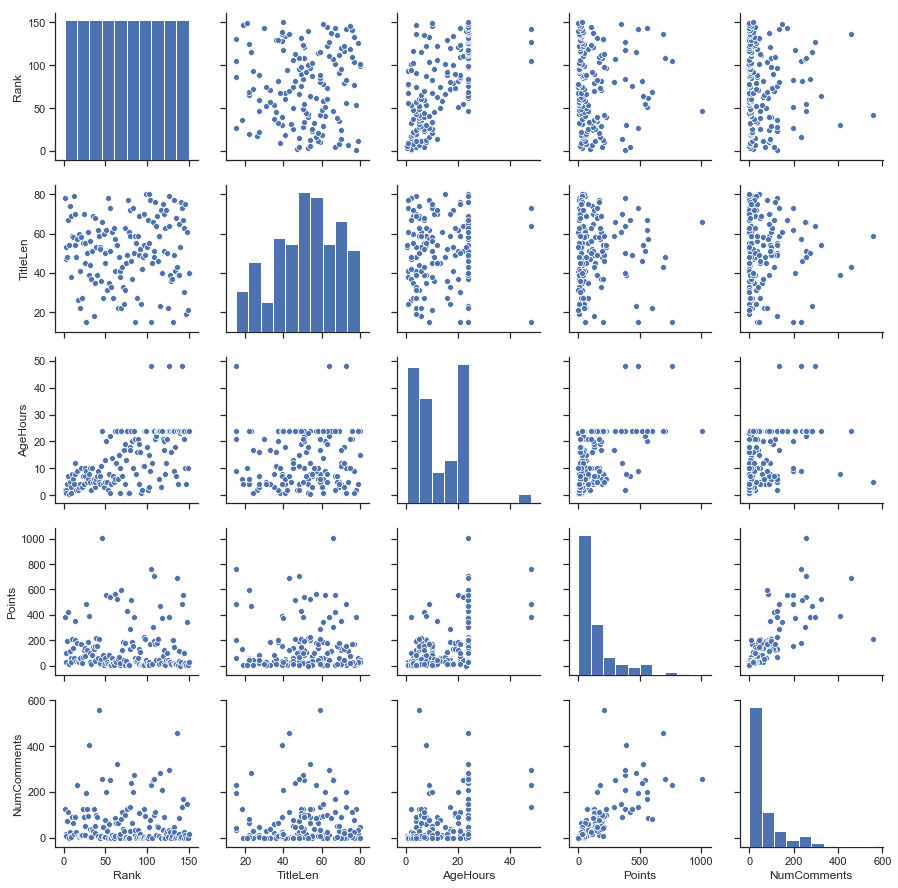

In [7]:
sns.set(style="ticks")
sns.pairplot(df);

**Nothing really obvious jumps out as a great predictor of rank...  Maybe age in hours has an inverse relationship?**

In [8]:
rankOLS = sm.ols(formula="Rank ~ TitleLen + AgeHours + Points + NumComments", data=df).fit()
rankOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     36.87
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           3.04e-21
Time:                        15:57:05   Log-Likelihood:                -725.44
No. Observations:                 150   AIC:                             1461.
Df Residuals:                     145   BIC:                             1476.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      39.5647      8.869      4.461      0.000      22.036      57.094
TitleLen        0.0464      0.151      0.307      0.760      -0.253       0.345
AgeHours        3.7463      0.309     12.130      0.000       3.136       4.357
Points         -0.1107      0.023     -4.783      0.000      -0.156      -0.065
NumComments     0.0111      0.040      0.275      0.784      -0.069       0.091
==============================================================================
Omnibus:                       13.561   Durbin-Watson:                   0.799
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.958
Skew:                           0.771   Prob(JB):                     0.000565
Kurtosis:                       3.130   Cond. No.                         898.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Taking everything together gives an r-squared of .619 which is not fantastic, but probably not nothing either.**

**It appears that TitleLen and NumComments don't have much bearing on the rank**

In [9]:
rankOLS = sm.ols(formula="Rank ~ TitleLen + AgeHours + Points", data=df).fit()
rankOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     49.45
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           4.10e-22
Time:                        15:57:05   Log-Likelihood:                -725.48
No. Observations:                 150   AIC:                             1459.
Df Residuals:                     146   BIC:                             1471.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.6752      8.832      4.492      0.000      22.221      57.130
TitleLen       0.0471      0.151      0.312      0.755      -0.251       0.345
AgeHours       3.7417      0.307     12.172      0.000       3.134       4.349
Points        -0.1061      0.016     -6.539      0.000      -0.138      -0.074
==============================================================================
Omnibus:                       13.546   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.941
Skew:                           0.770   Prob(JB):                     0.000570
Kurtosis:                       3.128   Cond. No.                         824.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
rankOLS = sm.ols(formula="Rank ~ AgeHours + Points + NumComments", data=df).fit()
rankOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     49.43
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           4.13e-22
Time:                        15:57:05   Log-Likelihood:                -725.49
No. Observations:                 150   AIC:                             1459.
Df Residuals:                     146   BIC:                             1471.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      41.9451      4.276      9.809      0.000      33.494      50.396
AgeHours        3.7470      0.308     12.171      0.000       3.139       4.355
Points         -0.1108      0.023     -4.806      0.000      -0.156      -0.065
NumComments     0.0113      0.040      0.281      0.779      -0.068       0.091
==============================================================================
Omnibus:                       13.548   Durbin-Watson:                   0.803
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.999
Skew:                           0.773   Prob(JB):                     0.000553
Kurtosis:                       3.103   Cond. No.                         431.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Both NumComments and TitleLen appear to have very high P values, even when taken independently - they should be removed from the model**

In [11]:
rankOLS = sm.ols(formula="Rank ~ AgeHours + Points", data=df).fit()
rankOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     74.58
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           4.38e-23
Time:                        15:57:05   Log-Likelihood:                -725.53
No. Observations:                 150   AIC:                             1457.
Df Residuals:                     147   BIC:                             1466.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.0949      4.229      9.953      0.000      33.737      50.453
AgeHours       3.7423      0.306     12.212      0.000       3.137       4.348
Points        -0.1062      0.016     -6.565      0.000      -0.138      -0.074
==============================================================================
Omnibus:                       13.527   Durbin-Watson:                   0.802
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.977
Skew:                           0.772   Prob(JB):                     0.000560
Kurtosis:                       3.100   Cond. No.                         393.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**After removing TitleLen and NumComments our r-squared barely changed**

**It seems like rank is based off of its age in hours (with a strong positive correlation) and its number of points (with a weaker negative correlation).  As time goes on it gets dramatically harder for post to maintain itself on the front page.**

**This seems like far and away the best model of the ones we tried and it seems like both of the variables have a relationship to rank, even if ageHours is much stronger**

In [12]:
frontPageList = [];
for i in df['Rank']:
    if i <= 30:
        frontPageList.append(1);
    else:
        frontPageList.append(0);

df.insert(len(df.columns), "FrontPage", frontPageList)

In [13]:
rankLogistic2 = sm.logit(formula='FrontPage ~ AgeHours + Points', data=df).fit()
rankLogistic2.summary()

Optimization terminated successfully.
         Current function value: 0.308756
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              FrontPage   No. Observations:                  150
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                            2
Date:                Wed, 05 Jun 2019   Pseudo R-squ.:                  0.3830
Time:                        15:57:05   Log-Likelihood:                -46.313
converged:                       True   LL-Null:                       -75.060
                                        LLR p-value:                 3.276e-13
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5831      0.413      1.410      0.158      -0.227       1.393
AgeHours      -0.4238      0.097     -4.352      0.000      -0.615      -0.233
Points         0.0107      0.003      3.772      0.000       0.005       0.016
==============================================================================
"""

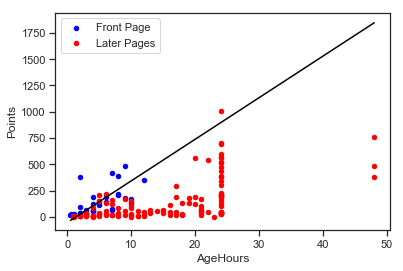

In [14]:
odds = lambda p: p/(1-p)
logit = lambda p: sc.log(odds(p))

ax = df[df['FrontPage']==1].plot.scatter(x='AgeHours', y='Points', color='blue', label='Front Page');
df[df['FrontPage']==0].plot.scatter(x='AgeHours', y='Points', color='red', label='Later Pages', ax=ax);

x = np.linspace(df['AgeHours'].min(), df['AgeHours'].max(), 1000)
par = rankLogistic2.params

plt.plot(x,(1/par['Points'])*(logit(.5) - par['Intercept'] - par['AgeHours']*x),color='Black')
plt.show()

In [15]:
df['FrontPagePredictions2'] = rankLogistic2.predict()>.5
pd.crosstab(index=df["FrontPage"], columns=df["FrontPagePredictions2"])

FrontPagePredictions2,False,True
FrontPage,,
0,110,10
1,17,13


**Since Age in Hours seems to have a more substantial impact on our Front Page Status it's worth doing a single variable regression as well:**

In [16]:
rankLogistic1 = sm.logit(formula='FrontPage ~ AgeHours', data=df).fit()
rankLogistic1.summary()

Optimization terminated successfully.
         Current function value: 0.383086
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              FrontPage   No. Observations:                  150
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Jun 2019   Pseudo R-squ.:                  0.2344
Time:                        15:57:05   Log-Likelihood:                -57.463
converged:                       True   LL-Null:                       -75.060
                                        LLR p-value:                 2.983e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4114      0.375      1.097      0.273      -0.324       1.147
AgeHours      -0.2035      0.048     -4.206      0.000      -0.298      -0.109
==============================================================================
"""

**It's worth noting that our r-squared value does take a somewhat substantial hit working with just Age in Hours...**

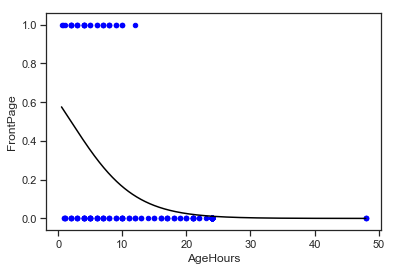

In [17]:
logistic = lambda x: 1/(1+sc.exp(-x))

df.plot.scatter(x='AgeHours', y='FrontPage', color='blue');

x = sc.linspace(df['AgeHours'].min(), df['AgeHours'].max(), 1000);
par = dict(rankLogistic1.params);
plt.plot(x, logistic(par['Intercept'] + par['AgeHours']*x), color='Black');
plt.show()

In [18]:
df['FrontPagePredictions1'] = rankLogistic1.predict()>.5
pd.crosstab(index=df["FrontPage"], columns=df["FrontPagePredictions1"])

FrontPagePredictions1,False,True
FrontPage,,
0,111,9
1,23,7


**Even with two variables, our model doesn't seem to be exceptionally predictive of what it takes to get to the front page - we only got correct predictions of front page submissions 14/30 times, our single variable model did even worse with 9/30 correct predictions**

**A quick googling suggests that rankValue = (p - 1) / (t + 2) ^ 1.5 is how Hackernews ranks their postings (though I got this formula from an older article and it might be outdated...), let's see if it matches our data!**

In [19]:
expectedRankValueList = [];
for i in df.index:
    expectedRankValue = (df['Points'][i] - 1) / ((df['AgeHours'][i] + 2) ** 1.5)
    expectedRankValueList.append(expectedRankValue)

df.insert(len(df.columns), "ExpectedRankValue", expectedRankValueList)

In [20]:
pd.set_option('display.max_rows', None)
display(df[['FrontPage', 'FrontPagePredictions2','ExpectedRankValue']])

,FrontPage,FrontPagePredictions2,ExpectedRankValue
0,1,True,47.625000
1,1,True,12.000000
2,1,True,6.837842
3,1,True,12.995904
4,1,True,15.555556
5,1,True,3.249695
6,1,False,6.047432
7,1,False,5.366563
8,1,True,4.811252
9,1,False,6.704029


**It looks like that formula isn't 100% accurate since the ExpectedRankValues aren't descending in order here.  Even so they seem to be doing a better job of predicting whether a post makes to the front page than our least squares calculation did**